In [1]:
import numpy as np
import scipy.io.wavfile as reader
import matplotlib.pyplot as plt
from scipy import signal

__Q1 Convolution__ <br>
Computes $(x*h)[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

In [2]:
#Q1 Convolution (a) Slow Convolution

x =np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h=np.array([0.25, 0.25, 0.25])


def slow_conv(x,h):
    x_pad=np.pad(x,(len(h)-1,len(h)-1),'constant') # pad so to have filters move beyond edges
    ans=np.zeros(len(x_pad)-len(h)+1, dtype='float32')

    for i in range(len(x_pad)-len(h)+1):
        for j in range(len(h)):
            ans[i]+=x_pad[i+j]*h[j]
      
    return ans

#Cross-check
print(slow_conv(x,h))
print(np.convolve(x,h))
print(np.allclose(slow_conv(x,h), np.convolve(x,h), atol = 1e-5))

[0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]
[0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]
True


In [3]:
#Q1 Convolution (c) Fast Convolution

x =np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h=np.array([0.25, 0.25, 0.25])


def fast_conv(x,h):
    x_pad=np.pad(x,(len(h)-1,len(h)-1),'constant') # pad so to have filters move beyond edges
    ans=np.zeros(len(x_pad)-len(h)+1)

    movingAvg=np.sum(x_pad[0:len(h)])/3

    #Note the following code works because the filter h is essentially 1/3*np.ones(len(h))
    for i in range(len(x_pad)-len(h)+1):
        ans[i]=movingAvg
        movingAvg-=x_pad[i]/3 # this is the item that wont be in the next window
        if len(x_pad)-len(h)>i: #prevent out of bounds 
            movingAvg+=x_pad[i+len(h)]/3 # this is the new item for the window
    
    return ans

#Cross-check
print(np.convolve(x,h)) 
print(fast_conv(x,h))

[0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]
[1.         2.33333333 2.66666667 2.33333333 2.66666667 4.33333333
 6.         7.         5.66666667 4.66666667 2.         1.33333333]


In [4]:
#Q1 Convolution (d) Time for slow and fast Convolutions

import time

x =np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h=np.array([1/3, 1/3, 1/3])

x_rep=np.repeat(x,100)
h_rep=np.repeat(h,100)


t0 = time.time()
slow_conv(x_rep, h_rep)
t1 = time.time()

fast_conv(x_rep,h_rep)
t2 = time.time()

print('Time for slow convolution: ', t1-t0)
print('Time for fast convolution: ', t2-t1)



Time for slow convolution:  2.0731334686279297
Time for fast convolution:  0.010020732879638672


__Q2 Matched filters with cross-correlation__

In [5]:

fs,song=reader.read('/Users/meenakshikhosla/Downloads/Corcovado.wav')
#limit to left ear

song=song[:,0]
fs,clip=reader.read('/Users/meenakshikhosla/Downloads/clip.wav')
clip=clip[:,0]
#%%
song=song.astype('float64')
clip=clip.astype('float64')
xcorr=signal.correlate(song,clip, 'valid')

plt.plot(xcorr)
plt.show()
maxtime=(np.argmax(xcorr))/fs 
print(maxtime, 'seconds')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/meenakshikhosla/Downloads/Corcovado.wav'

__Q3 Fourier series__ <br>
$y(t)=\sum_{k=1}^{K}\frac{sin(2\pi (2k-1)ft)}{2k-1}$

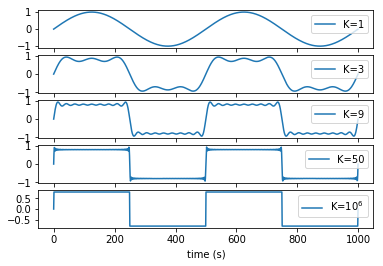

In [6]:
t=np.linspace(0,1,1000)
f=2;
sq1=0
sq3=0
sq9=0
sq50=0
sq1m=0

#1 sine wave
K=1
for i in range(1,K+1):
    sq1 += (np.sin((2*i-1)*f*t*2*np.pi))/(2*i-1)

# K=3
K=3
for i in range(1,K+1):
    sq3 += (np.sin((2*i-1)*f*t*2*np.pi))/(2*i-1)

# K=9
K=9
for i in range(1,K+1):
    sq9 += (np.sin((2*i-1)*f*t*2*np.pi))/(2*i-1)

# K=50
K=50
for i in range(1,K+1):
    sq50 += (np.sin((2*i-1)*f*t*2*np.pi))/(2*i-1)

# K=1000000
K=1000000
for i in range(1,K+1):
    sq1m += (np.sin((2*i-1)*f*t*2*np.pi))/(2*i-1)

    #generate a figure window
fig = plt.figure()
#set title

#plot 5 subplots in rows

plt.subplot(5, 1, 1)
plt.plot(sq1)
plt.legend(['K=1'],loc=1)
plt.subplot(5,1,2)
plt.plot(sq3)
plt.legend(['K=3'],loc=1)
plt.subplot(5,1,3)
plt.plot(sq9)
plt.legend(['K=9'],loc=1)
plt.subplot(5,1,4)
plt.plot(sq50)
plt.legend(['K=50'],loc=1)
plt.subplot(5,1,5)
plt.plot(sq1m)
plt.legend(['K=$10^6$'],loc=1)
#set xlabel
plt.xlabel('time (s)')
plt.show(block=True)


__Q4 Programming an LTI System__

(1399,)
(1399,)
(1399,)


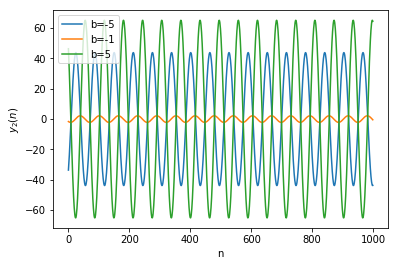

In [7]:
N=1000
b = 5

def output_lti(b):
    t=np.arange(-200,N,1)

    u1 = np.sin(0.1*t) #Original signal
    u2 = b*np.sin(0.1*(t-2)) #Response to h1
    y1 = u1 + u2 

    h = - np.repeat(1,200) 
    y2 = np.convolve(y1, h)
    print(y2.shape)
    return y2



pad = 199   #Remove padding to extract response from n=0 to n=1000

y2a = output_lti(-5)
y2b = output_lti(-1)
y2c = output_lti(5)

plt.plot(np.arange(1000), y2a[pad:1000+pad], label ='b=-5')
plt.plot(np.arange(1000), y2b[pad:1000+pad], label ='b=-1')
plt.plot(np.arange(1000), y2c[pad:1000+pad], label ='b=5')
plt.xlabel('n')
plt.ylabel('$y_2(n)$')
plt.legend()
plt.show()

(a) y1 is a sinusoid with the same frequency as x but an amplitude and phase that depends on $\beta$ <br>
(b) y2 is a moving (negative) sum of y1 (with a window size of 200)